In [1]:
import pandas as pd

In [8]:
df = pd.read_csv(r'Telco_Customer_Churn.csv')

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(7043, 21)

In [ ]:
#Check duplicated rows
df.duplicated().sum()

np.int64(0)

In [15]:
#drop customerID and change TotalCharges to numeric
df.drop('customerID', axis=1, inplace=True)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [22]:
df.info()
df.shape
print(f'Total null values in the dataset: {df.isna().sum().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [ ]:
#Drop null value rows
df = df.dropna(subset=['TotalCharges'])

In [27]:
df.shape

(7032, 20)

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

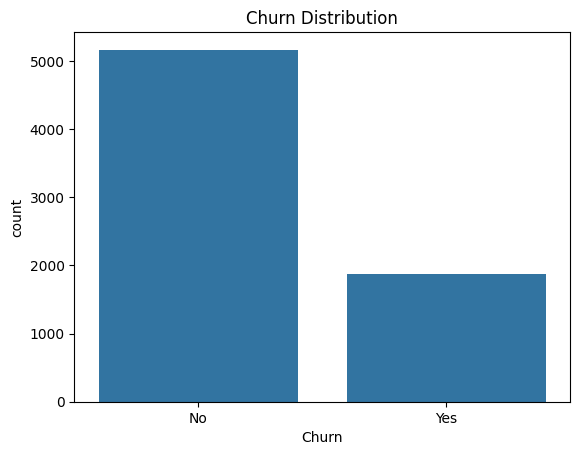

In [30]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

We can see that the dataset is imbalanced, with a higher number of customers who did not churn compared to those who did.

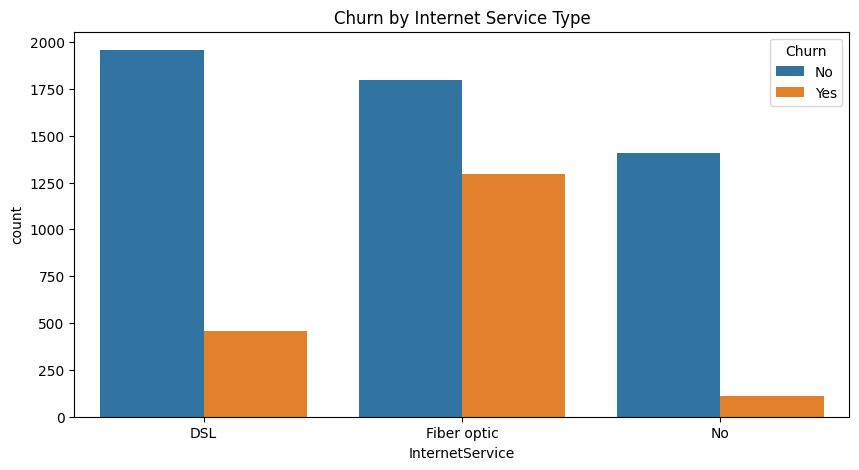

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.show()

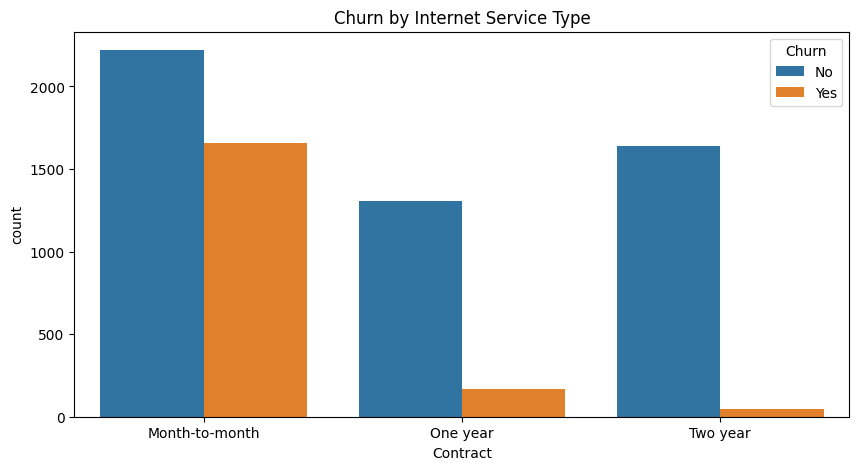

In [38]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.show()

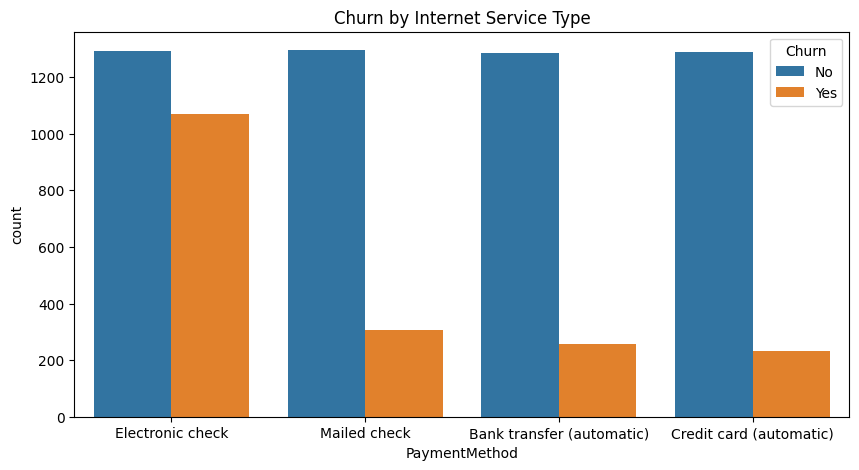

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.show()

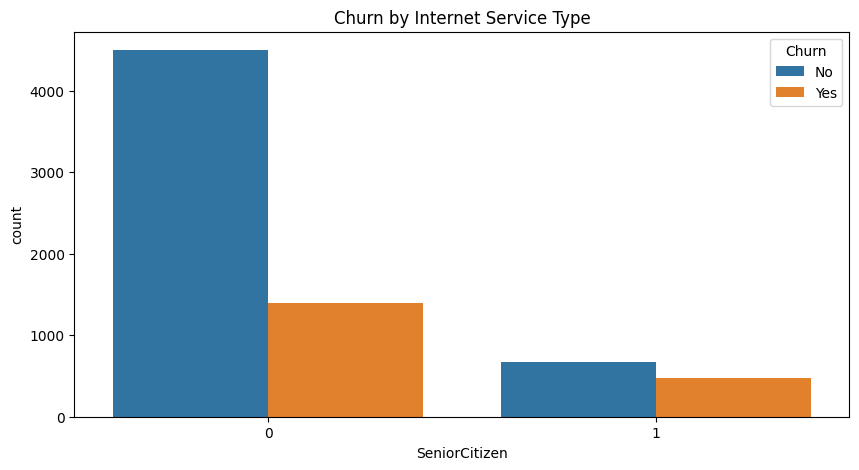

In [40]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.title("Churn by Internet Service Type")
plt.show()

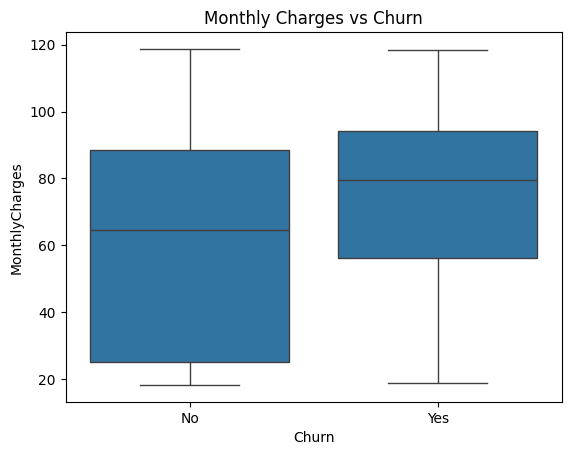

In [32]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

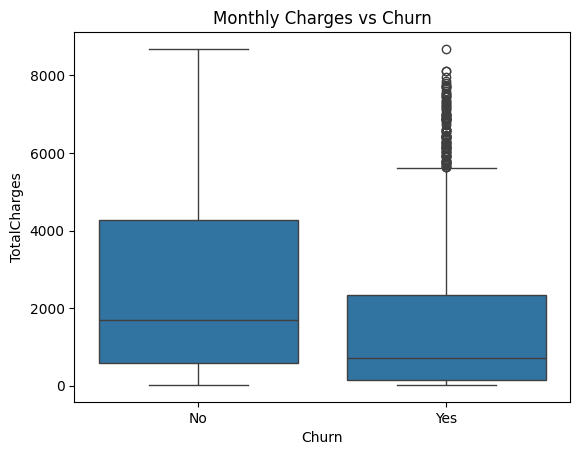

In [33]:
sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title("Monthly Charges vs Churn")
plt.show()

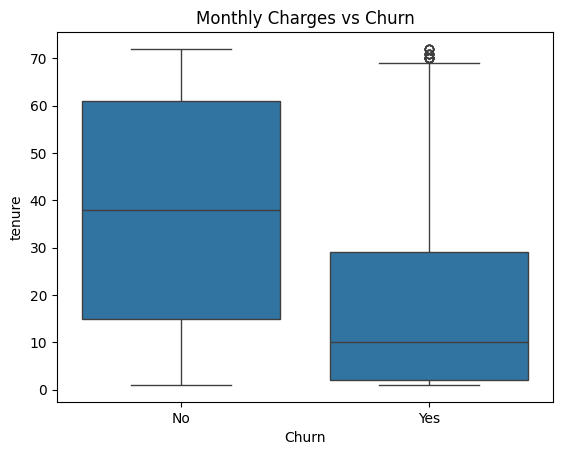

In [34]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Monthly Charges vs Churn")
plt.show()

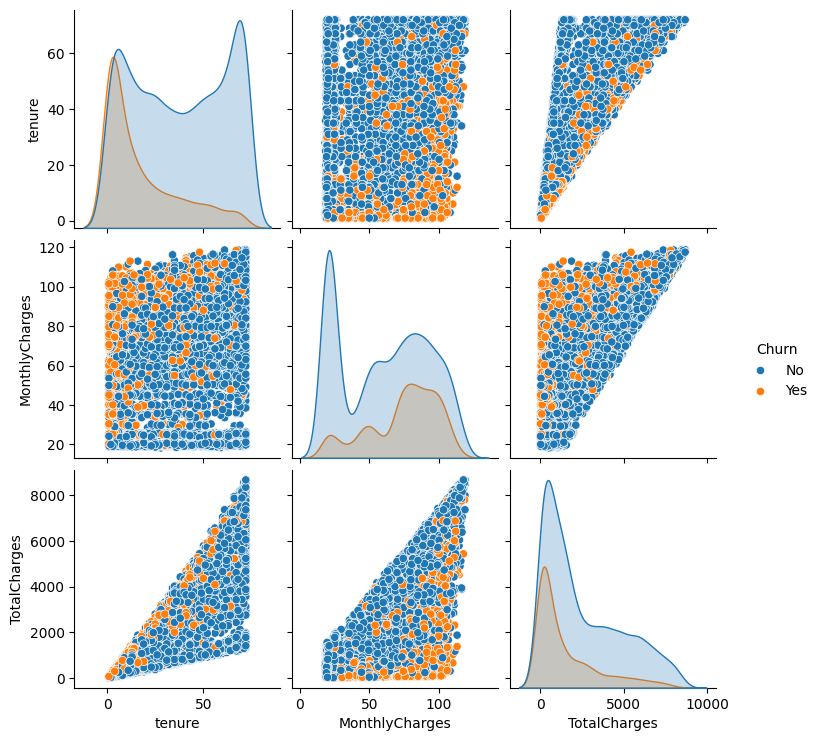

In [42]:
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')

We can observe that customers who churned (orange) tend to have lower tenure and lower TotalCharges, but often have higher MonthlyCharges. This supports earlier findings that customers who leave usually do so early and may be paying more per month.

There is also a strong positive linear relationship between tenure and TotalCharges, which is expected since longer-tenure customers accumulate higher total charges. The density plots along the diagonal show clear separation between churned and non-churned customers, especially in tenure and TotalCharges. Overall, this plot confirms that these numerical features are useful for distinguishing between churned and retained customers.

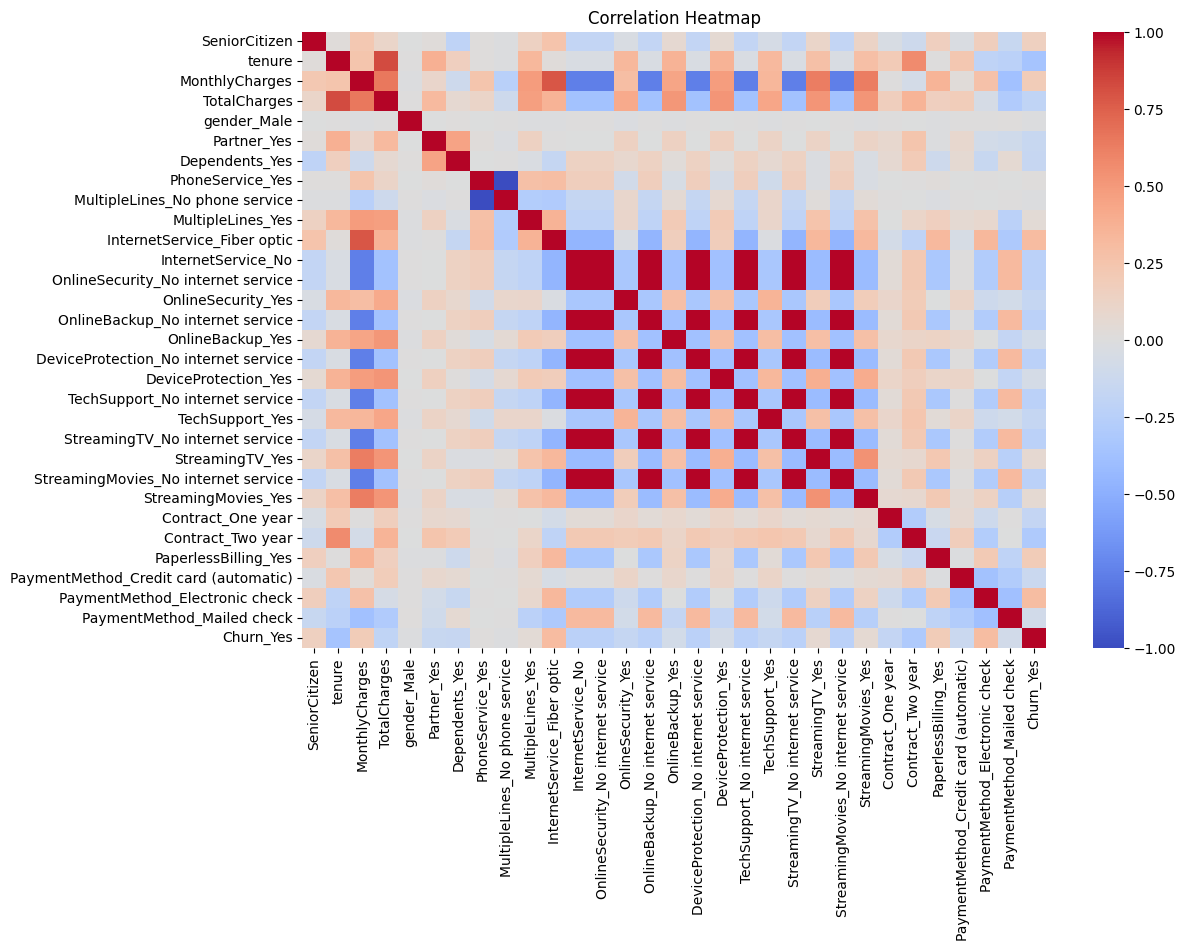

In [37]:
df_encoded = pd.get_dummies(df, drop_first=True)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


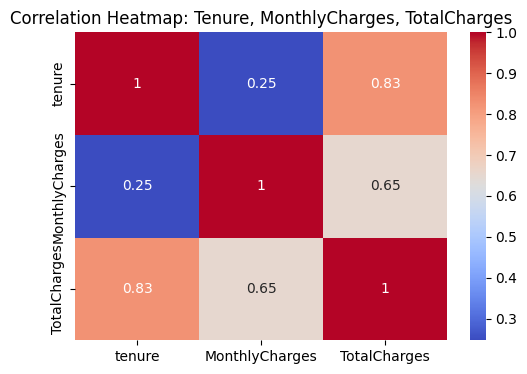

In [43]:
selected_features = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
plt.figure(figsize=(6, 4))
sns.heatmap(selected_features.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Heatmap: Tenure, MonthlyCharges, TotalCharges")
plt.show()

This correlation matrix focuses only on continuous numerical features: tenure, MonthlyCharges, and TotalCharges. The strongest correlation is between tenure and TotalCharges (0.83), which is expected since the total charges accumulate over time. There is also a moderate positive correlation between MonthlyCharges and TotalCharges (0.65), showing that customers with higher monthly fees tend to have higher total charges.

The correlation between tenure and MonthlyCharges is relatively weak (0.25), suggesting that the monthly rate does not strongly depend on how long a customer stays. Overall, this heatmap confirms that TotalCharges is influenced by both other features, and that tenure and MonthlyCharges each contribute useful, but different, information to churn prediction.

In [47]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Random Forest Prediction Model

In [52]:
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif_data[vif_data['Feature'] != 'const'])

          Feature       VIF
1          tenure  5.844646
2  MonthlyCharges  3.225293
3    TotalCharges  9.526697


Churn Prediction Model

In [55]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('Churn_Yes', axis=1)  # Target is encoded as Churn_Yes
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407

Accuracy: 0.7853589196872779


In [60]:
print(df['Churn'].value_counts())

Churn
No     5163
Yes    1869
Name: count, dtype: int64


About 78.5% of total predictions were correct.

But accuracy can be misleading when the classes are imbalanced (which you have).

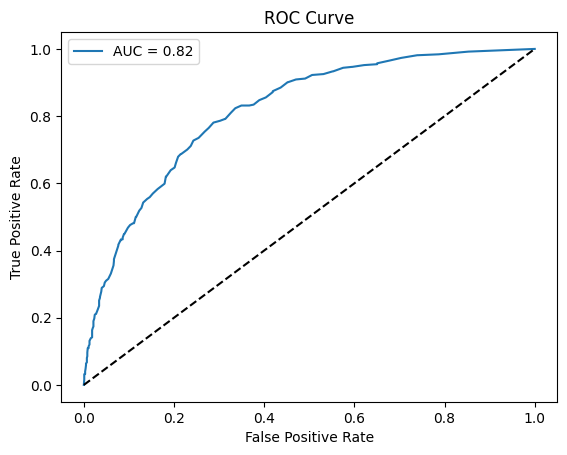

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


This means there's an 82% chance the model ranks a randomly chosen churned customer higher than a randomly chosen non-churned customer.

Logistic Regression with class_weight='balanced'

              precision    recall  f1-score   support

       False       0.91      0.71      0.80      1033
        True       0.50      0.79      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.71      1407
weighted avg       0.80      0.73      0.75      1407

Accuracy: 0.7341862117981521
ROC AUC: 0.831944235936036


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


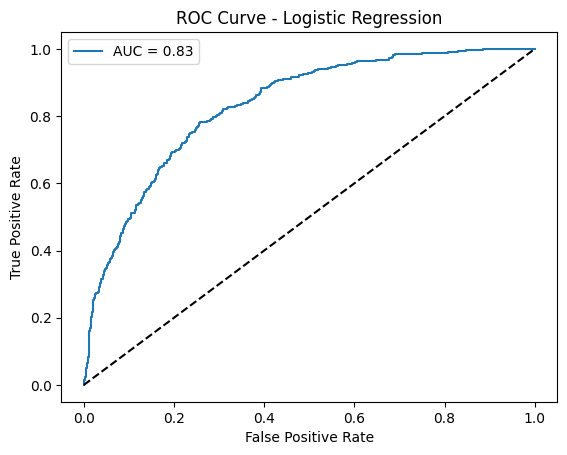

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize Logistic Regression with balanced class weight
lr_model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Train the model
lr_model.fit(X_train, y_train)

# Predict classes
y_pred = lr_model.predict(X_test)

# Predict probabilities for ROC AUC
y_probs = lr_model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.show()


In [65]:
# Assuming you have your test dataset (X_test) as a DataFrame and you kept the index
X_test = X_test.copy()
X_test['predicted_churn'] = model.predict(X_test)  # or y_pred from before
X_test['actual_churn'] = y_test.values  # true labels

# Add your time feature if it was dropped earlier (make sure it's aligned)
# For example, assume 'month' column exists


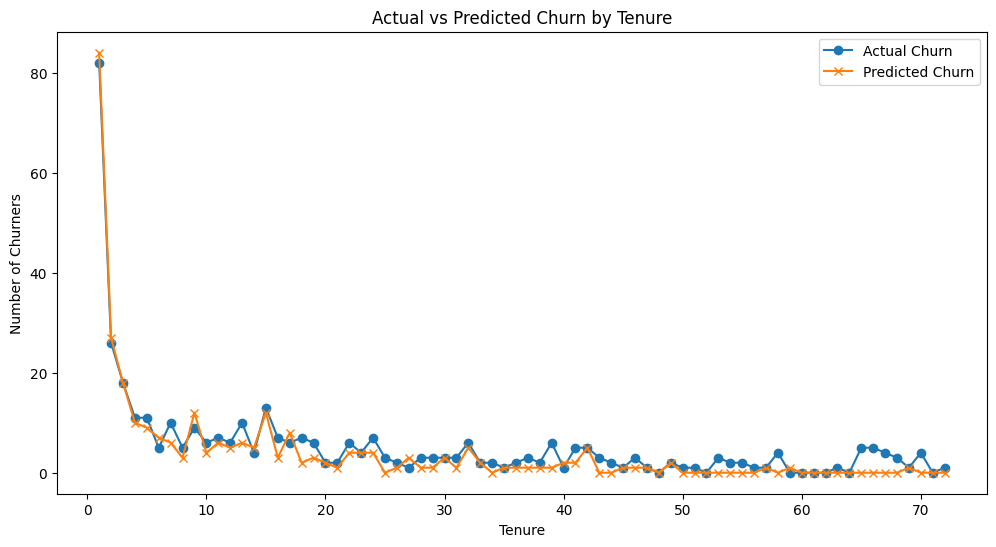

In [70]:
churn_summary = X_test.groupby('tenure')[['actual_churn', 'predicted_churn']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(churn_summary['tenure'], churn_summary['actual_churn'], label='Actual Churn', marker='o')
plt.plot(churn_summary['tenure'], churn_summary['predicted_churn'], label='Predicted Churn', marker='x')
plt.xlabel('Tenure')
plt.ylabel('Number of Churners')
plt.title('Actual vs Predicted Churn by Tenure')
plt.legend()
plt.show()


In [ ]:
Random Forest gives higher overall accuracy and better precision (fewer false positives for churn), but lower recall (misses more actual churners).

Logistic Regression with class_weight='balanced' improves recall a lot (finds more churners) but has lower precision and accuracy.

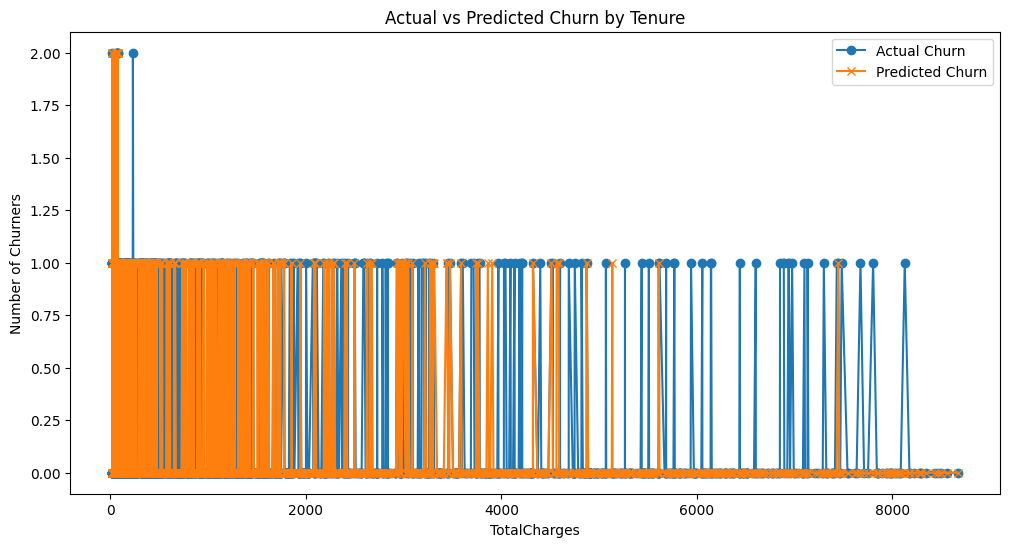

In [69]:
churn_summary = X_test.groupby('TotalCharges')[['actual_churn', 'predicted_churn']].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(churn_summary['TotalCharges'], churn_summary['actual_churn'], label='Actual Churn', marker='o')
plt.plot(churn_summary['TotalCharges'], churn_summary['predicted_churn'], label='Predicted Churn', marker='x')
plt.xlabel('TotalCharges')
plt.ylabel('Number of Churners')
plt.title('Actual vs Predicted Churn by Tenure')
plt.legend()
plt.show()